# Regression Predict Student Solution

© Explore Data Science Academy

---
### Honour Code

I {**YOUR NAME, YOUR SURNAME**}, confirm - by submitting this document - that the solutions in this notebook are a result of my own work and that I abide by the [EDSA honour code](https://drive.google.com/file/d/1QDCjGZJ8-FmJE3bZdIQNwnJyQKPhHZBn/view?usp=sharing).

Non-compliance with the honour code constitutes a material breach of contract.

### Predict Overview: Spain Electricity Shortfall Challenge

The government of Spain is considering an expansion of it's renewable energy resource infrastructure investments. As such, they require information on the trends and patterns of the countries renewable sources and fossil fuel energy generation. Your company has been awarded the contract to:

- 1. analyse the supplied data;
- 2. identify potential errors in the data and clean the existing data set;
- 3. determine if additional features can be added to enrich the data set;
- 4. build a model that is capable of forecasting the three hourly demand shortfalls;
- 5. evaluate the accuracy of the best machine learning model;
- 6. determine what features were most important in the model’s prediction decision, and
- 7. explain the inner working of the model to a non-technical audience.

Formally the problem statement was given to you, the senior data scientist, by your manager via email reads as follow:

> In this project you are tasked to model the shortfall between the energy generated by means of fossil fuels and various renewable sources - for the country of Spain. The daily shortfall, which will be referred to as the target variable, will be modelled as a function of various city-specific weather features such as `pressure`, `wind speed`, `humidity`, etc. As with all data science projects, the provided features are rarely adequate predictors of the target variable. As such, you are required to perform feature engineering to ensure that you will be able to accurately model Spain's three hourly shortfalls.
 
On top of this, she has provided you with a starter notebook containing vague explanations of what the main outcomes are. 

<a id="cont"></a>

## Table of Contents

<a href=#one>1. Importing Packages</a>

<a href=#two>2. Loading Data</a>

<a href=#three>3. Exploratory Data Analysis (EDA)</a>

<a href=#four>4. Data Engineering</a>

<a href=#five>5. Modeling</a>

<a href=#six>6. Model Performance</a>

<a href=#seven>7. Model Explanations</a>

 <a id="one"></a>
## 1. Importing Packages
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Importing Packages ⚡ |
| :--------------------------- |
| In this section you are required to import, and briefly discuss, the libraries that will be used throughout your analysis and modelling. |

---

In [19]:
# Libraries for data loading, data manipulation and data visulisation
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import csv
import seaborn as sns
from sklearn.model_selection import train_test_split
import plotly.express as px

# Libraries for data preparation and model building
from sklearn.linear_model import LinearRegression
import statsmodels.formula.api as sm
from statsmodels.graphics.correlation import plot_corr
import pickle
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
import math
from sklearn.linear_model import Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import VotingRegressor
from sklearn.metrics import mean_squared_error # for checking performance
from flaml import AutoML

# Setting global constants to ensure notebook results are reproducible
PARAMETER_CONSTANT = '###'

<a id="two"></a>
## 2. Loading the Data
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Loading the data ⚡ |
| :--------------------------- |
| In this section you are required to load the data from the `df_train` file into a DataFrame. |

---

In [2]:
train_df = pd.read_csv('df_train.csv')
test_df = pd.read_csv('df_test.csv')

<a id="three"></a>
## 3. Exploratory Data Analysis (EDA)
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Exploratory data analysis ⚡ |
| :--------------------------- |
| In this section, you are required to perform an in-depth analysis of all the variables in the DataFrame. |

---


In [20]:
# look at data statistics
train_df.shape

(8763, 49)

In [21]:
train_df.head(3)

,Unnamed: 0,time,Madrid_wind_speed,Valencia_wind_deg,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,...,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min,load_shortfall_3h
0,-,42 005.13,0.67,level_5,-,0.67,74.33,64.00,-,1.00,...,265.94,281.01,269.34,269.34,281.01,269.34,274.25,265.94,265.94,6 715.67
1,1.00,42 005.25,0.33,level_10,-,1.67,78.33,64.67,-,1.00,...,266.39,280.56,270.38,270.38,280.56,270.38,274.95,266.39,266.39,4 171.67
2,2.00,42 005.38,1.00,level_9,-,1.00,71.33,64.33,-,1.00,...,272.71,281.58,275.03,275.03,281.58,275.03,278.79,272.71,272.71,4 274.67


In [22]:
#check data frame for data types
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8763 entries, 0 to 8762
Data columns (total 49 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Unnamed: 0              8763 non-null   object 
 1    time                   8763 non-null   object 
 2    Madrid_wind_speed      8763 non-null   object 
 3    Valencia_wind_deg      8763 non-null   object 
 4    Bilbao_rain_1h         8763 non-null   object 
 5    Valencia_wind_speed    8763 non-null   object 
 6    Seville_humidity       8763 non-null   float64
 7    Madrid_humidity        8763 non-null   float64
 8    Bilbao_clouds_all      8763 non-null   object 
 9    Bilbao_wind_speed      8763 non-null   object 
 10   Seville_clouds_all     8763 non-null   object 
 11   Bilbao_wind_deg        8763 non-null   object 
 12   Barcelona_wind_speed   8763 non-null   object 
 13   Barcelona_wind_deg     8763 non-null   object 
 14   Madrid_clouds_all      8763 non-null   

In [23]:
#checking for null values in each columns
train_df.isnull().sum()

Unnamed: 0                   0
 time                        0
 Madrid_wind_speed           0
 Valencia_wind_deg           0
 Bilbao_rain_1h              0
 Valencia_wind_speed         0
 Seville_humidity            0
 Madrid_humidity             0
 Bilbao_clouds_all           0
 Bilbao_wind_speed           0
 Seville_clouds_all          0
 Bilbao_wind_deg             0
 Barcelona_wind_speed        0
 Barcelona_wind_deg          0
 Madrid_clouds_all           0
 Seville_wind_speed          0
 Barcelona_rain_1h           0
 Seville_pressure            0
 Seville_rain_1h             0
 Bilbao_snow_3h              0
 Barcelona_pressure          0
 Seville_rain_3h             0
 Madrid_rain_1h              0
 Barcelona_rain_3h           0
 Valencia_snow_3h            0
 Madrid_weather_id           0
 Barcelona_weather_id        0
 Bilbao_pressure             0
 Seville_weather_id          0
 Valencia_pressure        2068
 Seville_temp_max            0
 Madrid_pressure             0
 Valenci

In [24]:
#getting numerical features
numerical_features = [col for col in train_df if train_df[col].dtype =='float']

In [25]:
#get summary statistics for our Data
train_df[numerical_features].describe()

,Seville_humidity,Madrid_humidity,Madrid_weather_id,Barcelona_weather_id,Seville_weather_id,Seville_temp_max,Valencia_temp_max,Valencia_temp,Bilbao_weather_id,Seville_temp,...,Barcelona_temp_max,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min
count,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,...,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000
mean,62.658666,57.414608,799.515059,800.153374,797.946660,297.479660,291.337381,290.592346,724.722363,293.979138,...,291.157657,289.540443,289.855543,285.018045,286.423104,288.447461,287.966176,291.633502,288.419629,287.202321
std,22.621187,24.335333,7.292290,5.698086,10.077078,8.875754,7.565649,7.162229,115.846540,7.920881,...,7.273494,9.751986,6.528064,6.705611,6.818620,6.102555,7.105547,8.178188,9.346688,9.206168
min,8.330000,6.330000,727.670000,714.330000,731.000000,272.060000,269.890000,269.890000,207.330000,272.060000,...,272.150000,264.980000,270.820000,264.480000,267.480000,269.480000,269.060000,270.150000,264.980000,264.980000
25%,44.330000,36.330000,800.000000,800.000000,800.000000,291.315000,285.550000,285.150000,700.330000,288.285000,...,285.480000,282.150000,284.970000,280.085000,281.375000,284.150000,282.840000,285.820000,281.405000,280.300000
50%,65.670000,58.000000,800.000000,800.330000,800.000000,297.100000,291.040000,290.180000,800.000000,293.320000,...,290.150000,288.120000,289.420000,284.820000,286.160000,288.150000,287.630000,290.820000,287.050000,286.080000
75%,82.000000,78.670000,800.670000,801.000000,800.000000,304.150000,297.250000,296.060000,801.670000,299.620000,...,296.855000,296.820000,294.910000,289.820000,291.035000,292.970000,292.480000,297.150000,295.155000,293.885000
max,100.000000,100.000000,804.000000,804.000000,804.000000,320.480000,314.260000,310.430000,804.000000,314.980000,...,314.080000,314.480000,307.320000,309.820000,310.710000,304.820000,317.970000,314.820000,313.130000,310.380000


In [26]:
#check data skewness for numerical features
skewness = train_df[numerical_features].skew()

## check for presence of outliers for numerical features
outliers = train_df[numerical_features].kurtosis()

In [27]:
#features with high outlisers
highly_skewed_features = [features for features in skewness.index
                          if skewness[features] <-1.0 or skewness[features]> 1.0]
highly_Outlier_features = [features for features in outliers.index
                           if outliers[features] >3]

In [28]:
#highly skewed features
print('Highly Skewed features\n',skewness[highly_skewed_features])
print('\nfeatures with extreme outliers\n',outliers[highly_Outlier_features])

Highly Skewed features
  Madrid_weather_id       -7.718827
 Barcelona_weather_id    -9.926938
 Seville_weather_id      -4.502376
 Bilbao_weather_id       -1.234845
dtype: float64

features with extreme outliers
  Madrid_weather_id         62.515673
 Barcelona_weather_id     106.694079
 Seville_weather_id        20.462992
dtype: float64


## Comment
We can see that there are 22  fetaures which are highly skewed and 14 with high outliers.

Below we replace values with high outliers with the Median

In [29]:
## replace extreme outliers with the median
for col in highly_Outlier_features:
    new_list = []
    median = train_df[col].median()
    std = train_df[col].std()
    for row in train_df[col]:
        if abs(row-median) > std:
            new_list.append(median)
        else:
            new_list.append(row)
    train_df[col] = new_list

In [30]:
#check again for outliers
outliers = train_df[numerical_features].kurtosis()
highly_Outlier_features = [features for features in outliers.index
                           if outliers[features] >3]
print('\nfeatures with extreme outliers\n',outliers[highly_Outlier_features])


features with extreme outliers
  Seville_weather_id     7.046588
dtype: float64


## Comment
We have attempted to remove outliers, but the above features still have high outliers, we may contemplate removing them in the later steps

<Axes: >

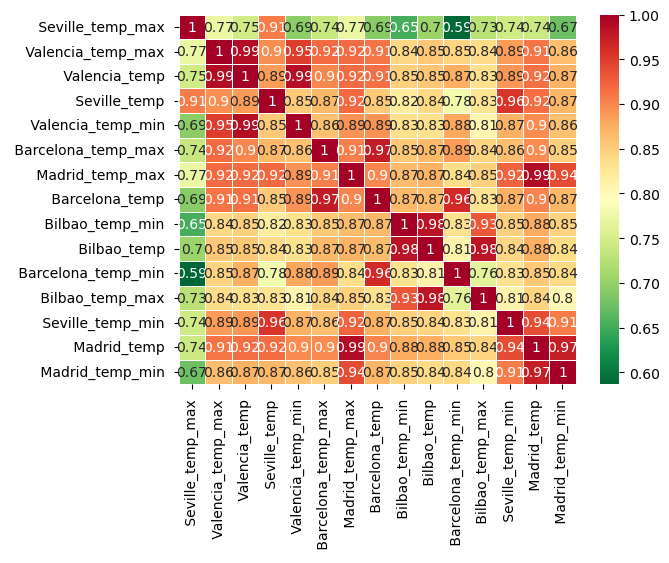

In [17]:
#plot interactions between all temperature features
temp_features = [feature for feature in train_df if 'temp' in feature]
corr = train_df[temp_features].corr()

sns.heatmap(corr, cmap='RdYlGn_r', linewidths=0.5, annot=True)

In [31]:
#plot interactions between all pressure features
pressure_features = [feature for feature in numerical_features if 'pressure' in feature]
corr = train_df[pressure_features].corr()

sns.heatmap(corr, cmap='RdYlGn_r',linewidths=0.5, annot=True)

ValueError: zero-size array to reduction operation fmin which has no identity

In [32]:
#plot interactions between all wind features
wind_features = [feature for feature in numerical_features if 'wind' in feature]
corr = train_df[wind_features].corr()

sns.heatmap(corr, cmap='RdYlGn_r',  linewidths=0.5, annot=True)

ValueError: zero-size array to reduction operation fmin which has no identity

<Axes: >

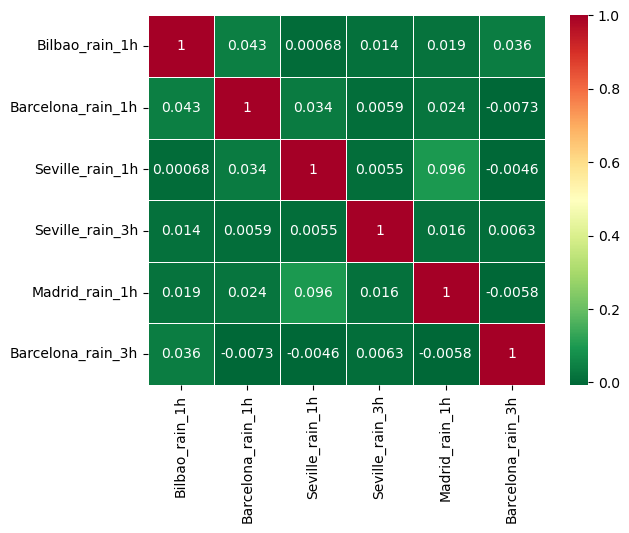

In [422]:
#plot interactions between all rain features
rain_features = [feature for feature in numerical_features if 'rain' in feature]
corr = train_df[rain_features].corr()

sns.heatmap(corr, cmap='RdYlGn_r', linewidths=0.5, annot=True)

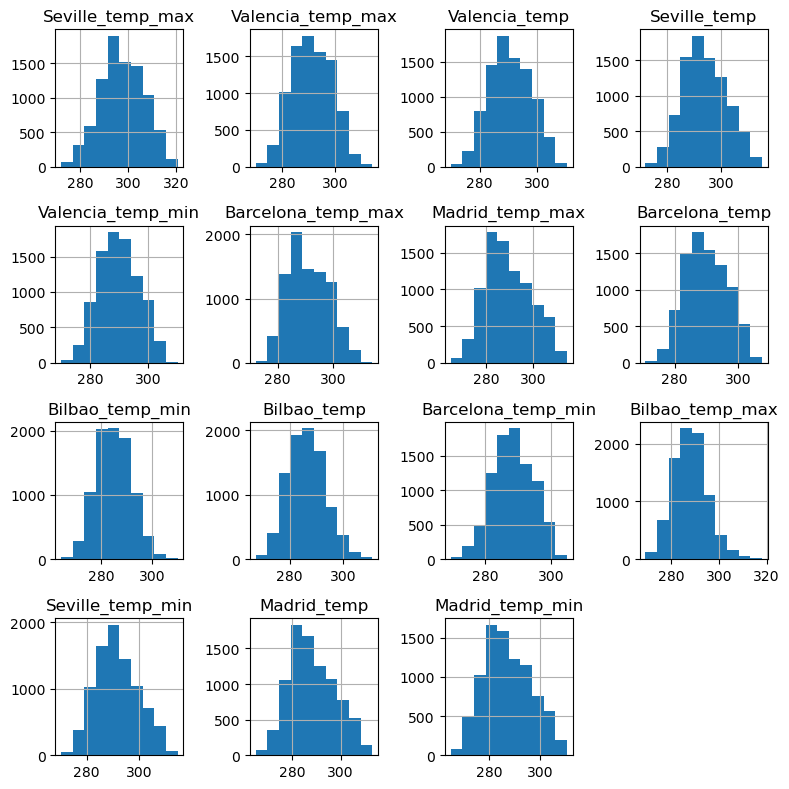

In [423]:
# plotting temp feature distributions
train_df[temp_features].hist(figsize=(8,8))
plt.tight_layout()
plt.show()

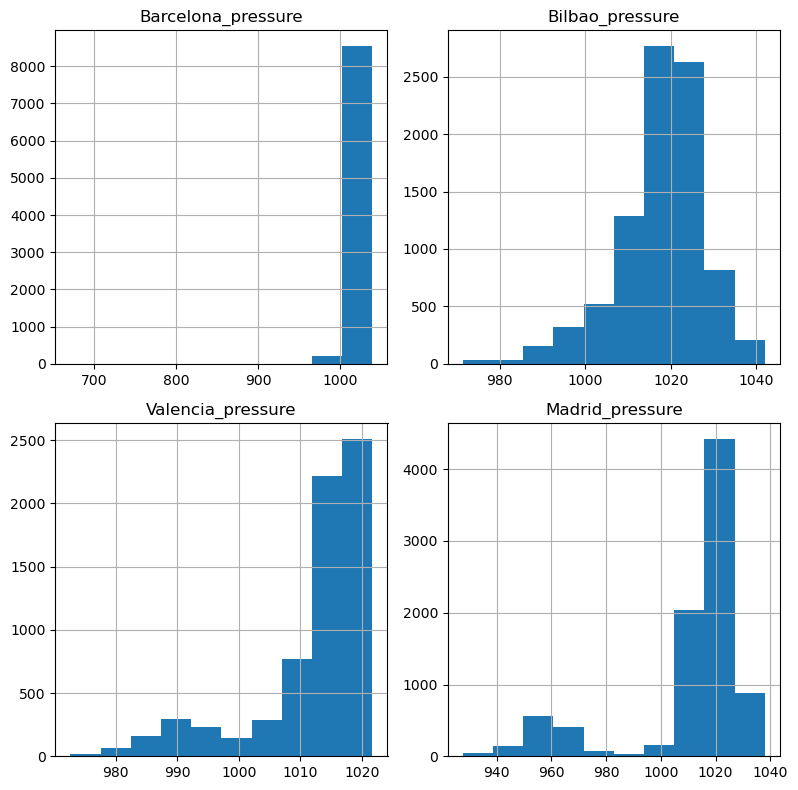

In [424]:
# plotting pressure feature distributions
train_df[pressure_features].hist(figsize=(8,8))
plt.tight_layout()
plt.show()

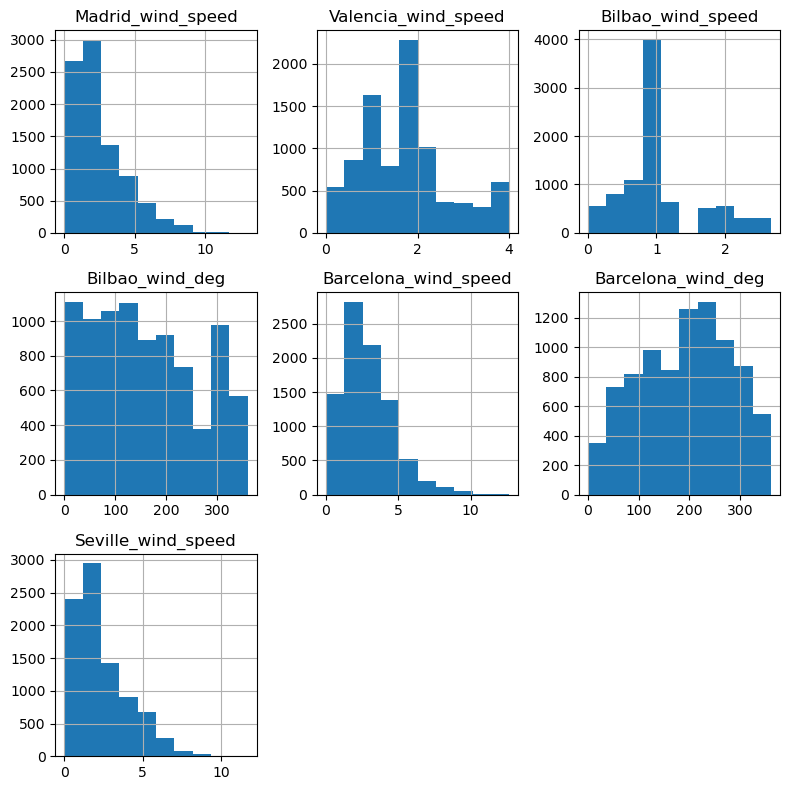

In [425]:
# plotting wind feature distributions
train_df[wind_features].hist(figsize=(8,8))
plt.tight_layout()
plt.show()

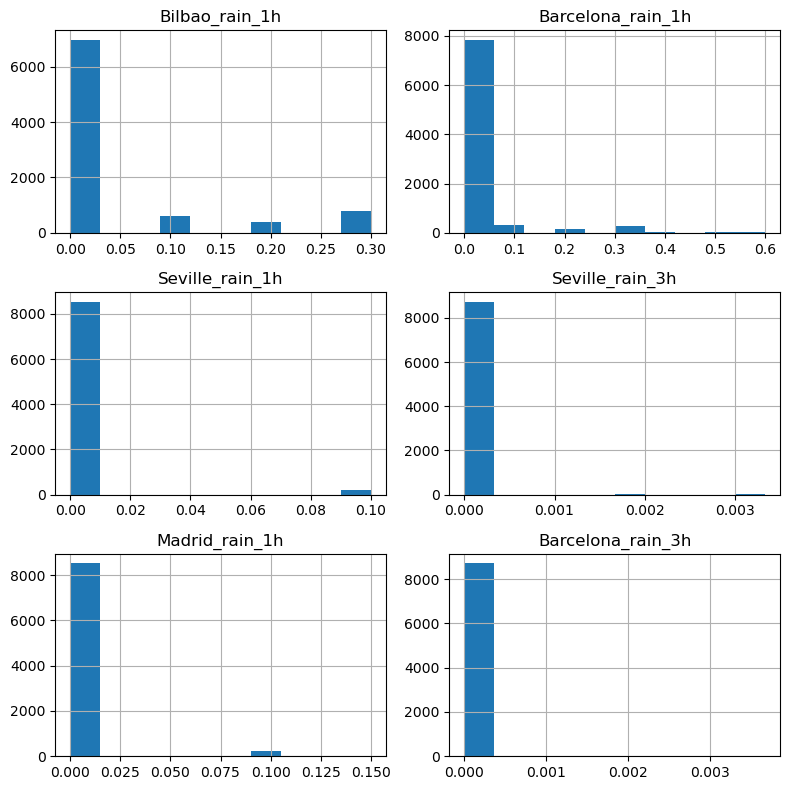

In [426]:
# plotting rain feature distributions
train_df[rain_features].hist(figsize=(8,8))
plt.tight_layout()
plt.show()

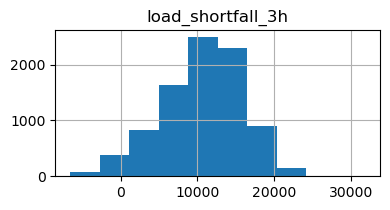

In [427]:
#plot distribution for the target VAR
train_df['load_shortfall_3h'].hist(figsize=(4,2))
plt.tight_layout()
plt.title('load_shortfall_3h')
plt.show()

In [77]:
#yearly time series data
fig = px.line(train_df, x='time', y='load_shortfall_3h')
fig.show()

ValueError: Value of 'x' is not the name of a column in 'data_frame'. Expected one of ['Unnamed: 0', ' time ', ' Madrid_wind_speed ', ' Valencia_wind_deg ', ' Bilbao_rain_1h ', ' Valencia_wind_speed ', ' Seville_humidity ', ' Madrid_humidity ', ' Bilbao_clouds_all ', ' Bilbao_wind_speed ', ' Seville_clouds_all ', ' Bilbao_wind_deg ', ' Barcelona_wind_speed ', ' Barcelona_wind_deg ', ' Madrid_clouds_all ', ' Seville_wind_speed ', ' Barcelona_rain_1h ', ' Seville_pressure ', ' Seville_rain_1h ', ' Bilbao_snow_3h ', ' Barcelona_pressure ', ' Seville_rain_3h ', ' Madrid_rain_1h ', ' Barcelona_rain_3h ', ' Valencia_snow_3h ', ' Madrid_weather_id ', ' Barcelona_weather_id ', ' Bilbao_pressure ', ' Seville_weather_id ', ' Valencia_pressure ', ' Seville_temp_max ', ' Madrid_pressure ', ' Valencia_temp_max ', ' Valencia_temp ', ' Bilbao_weather_id ', ' Seville_temp ', ' Valencia_humidity ', ' Valencia_temp_min ', ' Barcelona_temp_max ', ' Madrid_temp_max ', ' Barcelona_temp ', ' Bilbao_temp_min ', ' Bilbao_temp ', ' Barcelona_temp_min ', ' Bilbao_temp_max ', ' Seville_temp_min ', ' Madrid_temp ', ' Madrid_temp_min ', ' load_shortfall_3h '] but received: time

In [429]:
# check for variance for all numerical fetures
train_df[numerical_features].var().sort_values(ascending=True)

Valencia_snow_3h        0.000000e+00
Seville_rain_3h         1.982938e-08
Barcelona_rain_3h       3.166502e-08
Bilbao_snow_3h          2.226687e-04
Seville_rain_1h         2.426121e-04
Madrid_rain_1h          2.756652e-04
Barcelona_rain_1h       7.472117e-03
Bilbao_rain_1h          8.766845e-03
Bilbao_wind_speed       3.739447e-01
Valencia_wind_speed     8.857624e-01
Seville_wind_speed      2.798577e+00
Barcelona_wind_speed    3.211971e+00
Madrid_wind_speed       3.423872e+00
Barcelona_weather_id    3.246801e+01
Barcelona_temp_min      3.724164e+01
Barcelona_temp          4.261624e+01
Bilbao_temp_min         4.496603e+01
Bilbao_temp             4.649443e+01
Valencia_temp_min       4.771220e+01
Bilbao_temp_max         5.048941e+01
Valencia_temp           5.129816e+01
Barcelona_temp_max      5.290435e+01
Madrid_weather_id       5.317765e+01
Valencia_temp_max       5.723970e+01
Seville_temp            6.274203e+01
Seville_temp_min        6.688329e+01
Seville_temp_max        7.878004e+01
M

<a id="four"></a>
## 4. Data Engineering
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Data engineering ⚡ |
| :--------------------------- |
| In this section you are required to: clean the dataset, and possibly create new features - as identified in the EDA phase. |

---

In [430]:
# remove missing values/ features
#columns such as those that contain 'id' contain no usefull information\

def drop_cols(data):
    #drop all id cols
    data = data.drop([col for col in data if 'id' in col], axis ='columns')

    #drop the unnamed col in both 
    data = data.drop(['Unnamed: 0'],axis=1)

    #drop cols with large missing values
    data = data.drop(['Seville_pressure','Valencia_wind_deg'],axis='columns')
    
    return data
    

train_df = drop_cols(train_df)
test_df = drop_cols(test_df)
    

In [431]:
# create new features

#Will average all pressure fetures into a single feature and drop the rest.
def new_features(data):
    
    #code the time col
    time =  pd.to_datetime(data['time'])
    data['time'] = time

    data['Day'] = data['time'].dt.day
    data['month'] = data['time'].dt.month
    data['hour'] = data['time'].dt.hour

    
    similar_list = ['temp','pressure','rain','wind','snow','cloud']
    
    for se in similar_list:
        temp_features = [col for col in data.columns.tolist() if se in col]
        data['av_spain_'+se] = data[temp_features].mean(axis=1)
        data = data.drop(temp_features, axis='columns')
    
    #drop time col
    data = data.drop(['time'],axis='columns')

    return data
        
train_df = new_features(train_df)
test_df = new_features(test_df)



In [432]:
#drop the time col
labels = train_df['load_shortfall_3h']
features = train_df.drop(['load_shortfall_3h'],axis='columns')


In [433]:
# create scaler object

def scale_data(data):
    
    scaler = StandardScaler()
    cols = data.columns.tolist()
    
    #scale data
    X_scaled = scaler.fit_transform(data)

    X_standardise = pd.DataFrame(X_scaled,columns=cols)

    #after normalizing, we can fill nan with zero
    X_standardise.fillna(0)
    
    return X_standardise

features = scale_data(features)
test_df = scale_data(test_df)

<a id="five"></a>
## 5. Modelling
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Modelling ⚡ |
| :--------------------------- |
| In this section, you are required to create one or more regression models that are able to accurately predict the thee hour load shortfall. |

---

In [434]:
#train test split
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=50)

In [435]:
# create targets and features dataset


In [436]:
# create one or more ML models

#simple linear model
lm = LinearRegression()
#lm.fit(X_train['Day'],y_train) #will fit a simple linear model on Day of the month 

#multiple linear model
lm2 = LinearRegression()
lm2.fit(X_train,y_train) #fit a multiple linear model on all the features and targets

#Ridge regression
rg = Ridge()
rg.fit(X_train, y_train)

#LASSO model
ls = Lasso(alpha=0.01)
ls.fit(X_train, y_train)

#Decision Tree
dt = DecisionTreeRegressor(max_depth=5,random_state=42)
dt.fit(X_train, y_train.values.ravel())

#support vector machine
sv = sv_reg = SVR(kernel='rbf', gamma='auto')
sv.fit(X_train, y_train.values.ravel())

#random forest
rf = RandomForestRegressor(n_estimators=70, max_depth=7)
rf.fit(X_train, y_train.values.ravel())

#ensemble method
models = [("ls",ls),("SVR",sv),("rf",rf)]

#fit AutoML
#automl = AutoML()
#automl.fit(X_train, y_train)

# weights for weighted model averaging
model_weightings = np.array([0.1,0.1,0.8])
voting_reg = VotingRegressor(estimators=models,weights=model_weightings)
voting_reg.fit(X_train,y_train.values.ravel())


VotingRegressor(estimators=[('ls', Lasso(alpha=0.01)),
                            ('SVR', SVR(gamma='auto')),
                            ('rf',
                             RandomForestRegressor(max_depth=7,
                                                   n_estimators=70))],
                weights=array([0.1, 0.1, 0.8]))

In [437]:
# evaluate one or more ML models
# Evaluate multiple linear morel performance
lm2_pred = lm2.predict(X_test)

# Evaluate Ridge Model performance
rg_pred = dt.predict(X_test)

# Evaluate LASSO Model performance
ls_pred = ls.predict(X_test)

# Evaluate Decision Tree model performance
dt_pred = dt.predict(X_test)

# Evaluate support vector performance
sv_pred = sv.predict(X_test)

# Evaluate Support Vector performance
rf_pred = rf.predict(X_test)

# Evaluate Ensemble performance
emb_pred = voting_reg.predict(X_test)

# Evaluate AutoML performance
#at_pred = automl.predict(X_test)

<a id="six"></a>
## 6. Model Performance
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Model performance ⚡ |
| :--------------------------- |
| In this section you are required to compare the relative performance of the various trained ML models on a holdout dataset and comment on what model is the best and why. |

---

In [438]:
# Compare model performance
model_performance = {
    'lm': np.sqrt(mean_squared_error(y_test,lm2_pred)),
    'RG': np.sqrt(mean_squared_error(y_test,rg_pred)),
    'ls': np.sqrt(mean_squared_error(y_test,ls_pred)),
    'DT': np.sqrt(mean_squared_error(y_test,dt_pred)),
    'SV': np.sqrt(mean_squared_error(y_test,sv_pred)),
    'RF': np.sqrt(mean_squared_error(y_test,rf_pred)),
    'EMB':np.sqrt(mean_squared_error(y_test,emb_pred))
}
model_performance

{'lm': 4968.812692136311,
 'RG': 4299.4557210163675,
 'ls': 4968.814346616717,
 'DT': 4299.4557210163675,
 'SV': 5328.268509218885,
 'RF': 3964.465496013897,
 'EMB': 4053.554073621893}

In [439]:
#storing our model
model_save_path = "mlr_model.pkl"
with open(model_save_path,'wb') as file:
    pickle.dump(rf_pred,file)

In [440]:
# Choose best model and motivate why it is the best choice

#the best model so far is the Random forect model. Used below to predict the test set.
rf_pred = rf.predict(test_df)
test_df = pd.read_csv('df_test.csv')
#df = test_df[['time']]
#df['load_shortfall_3h'] = rf_pred
#df.to_csv('submission.csv',index=False)

<a id="seven"></a>
## 7. Model Explanations
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Model explanation ⚡ |
| :--------------------------- |
| In this section, you are required to discuss how the best performing model works in a simple way so that both technical and non-technical stakeholders can grasp the intuition behind the model's inner workings. |

---

In [ ]:
# discuss chosen methods logic